In [1]:
from HighContrastPointDetector import HighContrastPointDetector
from ImageProportionalResizer import ImageProportionalResizer
from OrientationFieldCreator import OrientationFieldCreator
from FingerprintComparator import FingerPrintComparator
from DistanceCalculator import DistanceCalculator
from ClusterCreator import ClusterCreator
from Fingerprint import Fingerprint
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os

In [2]:
resizer = ImageProportionalResizer()
image_01_01 = resizer.resize(cv.imread('fingerprints/finger_print_01_01_C.bmp'))
image_01_02 = resizer.resize(cv.imread('fingerprints/finger_print_01_02_C.bmp'))
image_02 = resizer.resize(cv.imread('fingerprints/finger_print_06.bmp'))
image_03 = cv.imread('fingerprints/example_0.bmp')

In [3]:
print(image_01_01.shape)
print(image_01_02.shape)
print(image_02.shape)
print(image_03.shape)

(90, 63, 3)
(90, 62, 3)
(101, 68, 3)
(103, 96, 3)


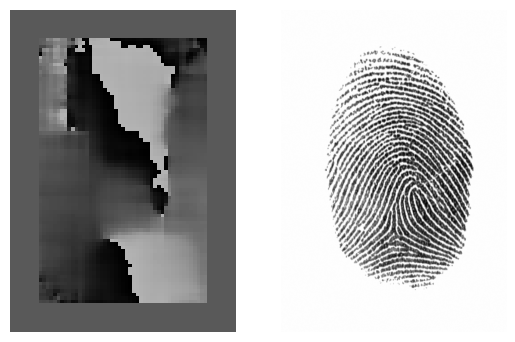

In [4]:
orientation_field_creator = OrientationFieldCreator(16)
if not os.path.exists("orientation_fields"): os.makedirs("orientation_fields")

def show(im1, im2):
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(im1, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(im2)

orientation_field_image_01_01 = orientation_field_creator.create_field_for(image_01_01)
cv.imwrite("orientation_fields/orientation_field_image_01_01.png", orientation_field_image_01_01)
show(orientation_field_image_01_01, cv.imread('fingerprints/finger_print_01_01_C.bmp'))

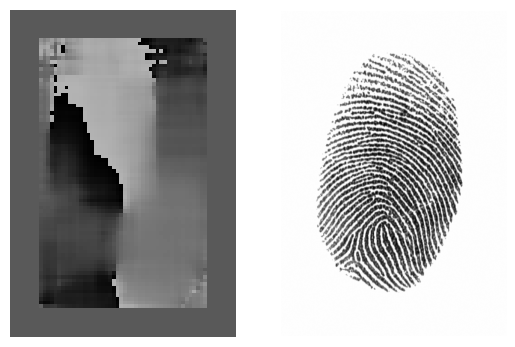

In [5]:
orientation_field_image_01_02 = orientation_field_creator.create_field_for(image_01_02)
cv.imwrite("orientation_fields/orientation_field_image_01_02.png", orientation_field_image_01_02)
show(orientation_field_image_01_02, cv.imread('fingerprints/finger_print_01_02_C.bmp'))

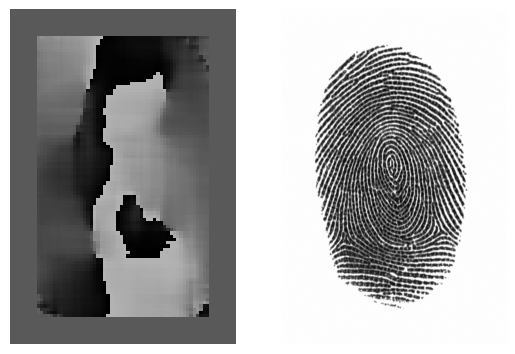

In [6]:
orientation_field_image_02 = orientation_field_creator.create_field_for(image_02)
cv.imwrite("orientation_fields/orientation_field_image_02.png", orientation_field_image_02)
show(orientation_field_image_02, cv.imread('fingerprints/finger_print_06.bmp'))

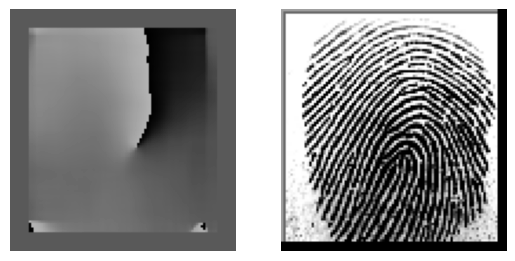

In [7]:
orientation_field_image_03 = orientation_field_creator.create_field_for(image_03)
cv.imwrite("orientation_fields/orientation_field_image_03.png", orientation_field_image_03)
show(orientation_field_image_03, cv.imread('fingerprints/example_0.bmp'))

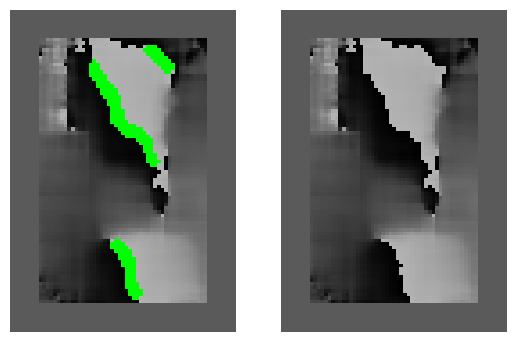

In [8]:
def create_image_with_hc(image):
    result = image.copy()
    for point in HighContrastPointDetector(3.7).calculate_for(image):
        cv.circle(result, (point[1], point[0]), 1, (0, 255, 0), -1)
    return result

image = cv.cvtColor(cv.imread("orientation_fields/orientation_field_image_01_01.png", cv.COLOR_GRAY2BGR), cv.COLOR_GRAY2BGR)
show(create_image_with_hc(image), image)

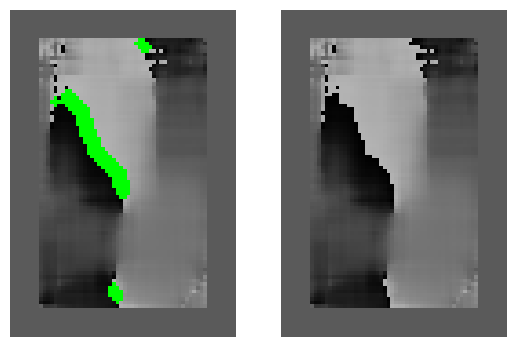

In [9]:
image = cv.cvtColor(cv.imread("orientation_fields/orientation_field_image_01_02.png", cv.COLOR_GRAY2BGR), cv.COLOR_GRAY2BGR)
show(create_image_with_hc(image), image)

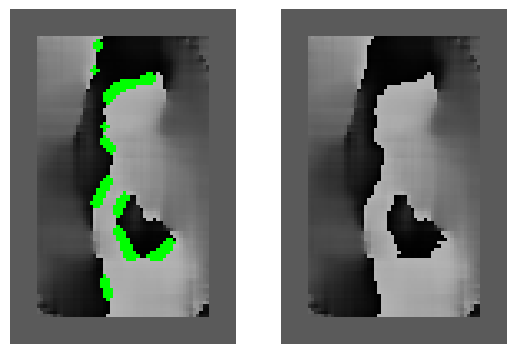

In [10]:
image = cv.cvtColor(cv.imread("orientation_fields/orientation_field_image_02.png", cv.COLOR_GRAY2BGR), cv.COLOR_GRAY2BGR)
show(create_image_with_hc(image), image)

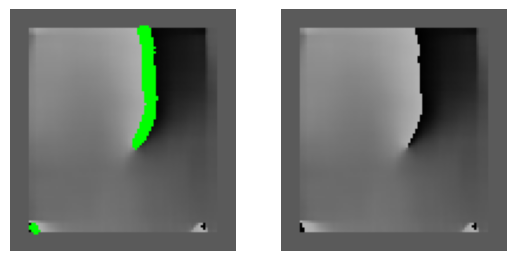

In [11]:
image = cv.cvtColor(cv.imread("orientation_fields/orientation_field_image_03.png", cv.COLOR_GRAY2BGR), cv.COLOR_GRAY2BGR)
show(create_image_with_hc(image), image)

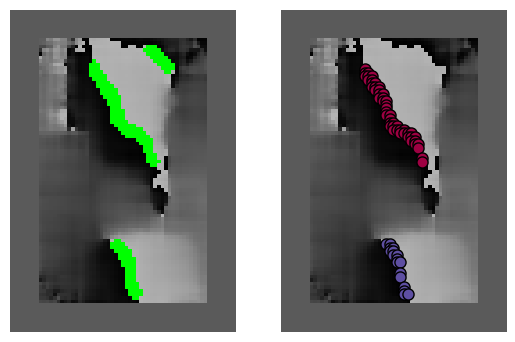

In [12]:
def show_cluster(image, clusters):
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(create_image_with_hc(cv.cvtColor(image, cv.COLOR_GRAY2BGR)), cmap='gray', vmin=0, vmax=255)
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(clusters))]
    for label, (color, points) in enumerate(zip(colors, clusters.values())):
        cluster_points = np.array(points)
        plt.plot(cluster_points[:, 1], cluster_points[:, 0], 'o', markerfacecolor=tuple(color), markeredgecolor="k", markersize=8)

image = cv.imread("orientation_fields/orientation_field_image_01_01.png", cv.COLOR_GRAY2BGR)
hc_points = HighContrastPointDetector(4).calculate_for(image)
dictionary = ClusterCreator().calculate(hc_points)
show_cluster(image, dictionary)

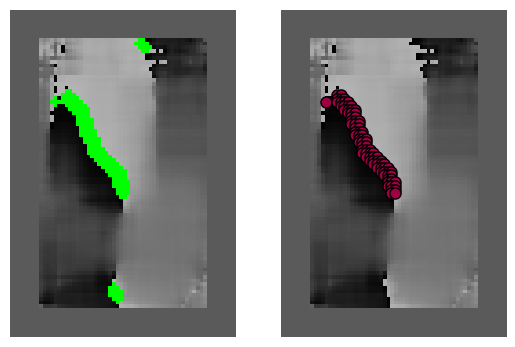

In [13]:
image = cv.imread("orientation_fields/orientation_field_image_01_02.png", cv.COLOR_GRAY2BGR)
hc_points = HighContrastPointDetector(3.7).calculate_for(image)
dictionary = ClusterCreator().calculate(hc_points)
show_cluster(image, dictionary)

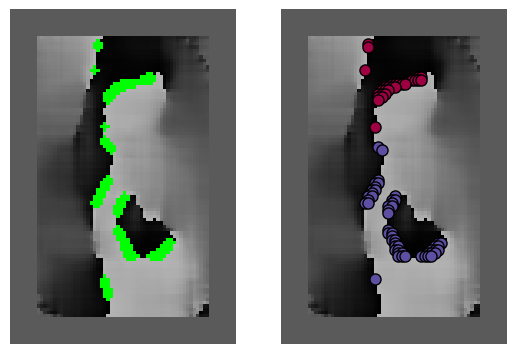

In [14]:
image = cv.imread("orientation_fields/orientation_field_image_02.png", cv.COLOR_GRAY2BGR)
hc_points = HighContrastPointDetector(3.7).calculate_for(image)
dictionary = ClusterCreator().calculate(hc_points)
show_cluster(image, dictionary)

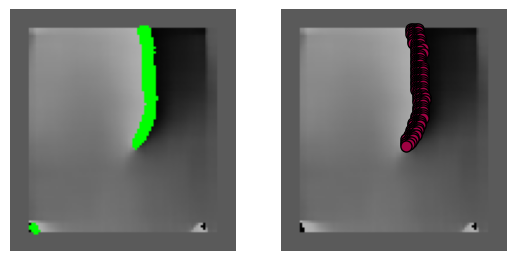

In [15]:
image = cv.imread("orientation_fields/orientation_field_image_03.png", cv.COLOR_GRAY2BGR)
hc_points = HighContrastPointDetector(3.7).calculate_for(image)
dictionary = ClusterCreator().calculate(hc_points)
show_cluster(image, dictionary)

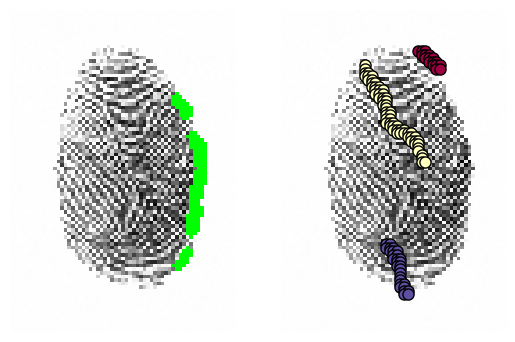

In [16]:
fingerprint_01_01 = Fingerprint("finger_print_01_01", cv.imread("fingerprints/finger_print_01_01_C.bmp", cv.COLOR_GRAY2BGR))
fingerprint_01_02 = Fingerprint("finger_print_01_02", cv.imread("fingerprints/finger_print_01_02_C.bmp", cv.COLOR_GRAY2BGR))
fingerprint_02 = Fingerprint("finger_print_02", cv.imread("fingerprints/finger_print_06.bmp", cv.COLOR_GRAY2BGR))
fingerprint_03 = Fingerprint("fingerprint_03", cv.imread("fingerprints/example_0.bmp", cv.COLOR_GRAY2BGR)[:, :, 0])

show_cluster(fingerprint_01_01.resized_image, fingerprint_01_01.clusters)

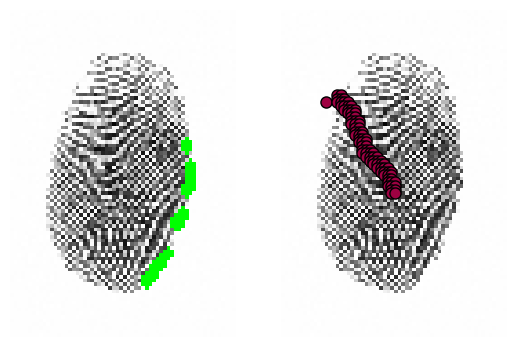

In [17]:
show_cluster(fingerprint_01_02.resized_image, fingerprint_01_02.clusters)

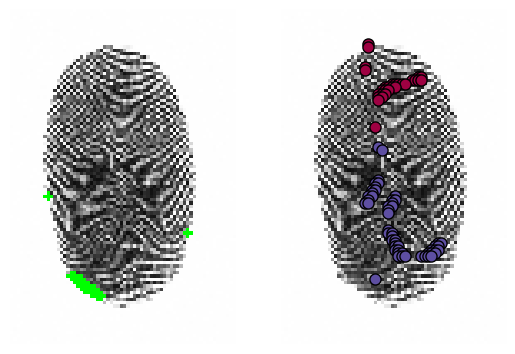

In [18]:
show_cluster(fingerprint_02.resized_image, fingerprint_02.clusters)

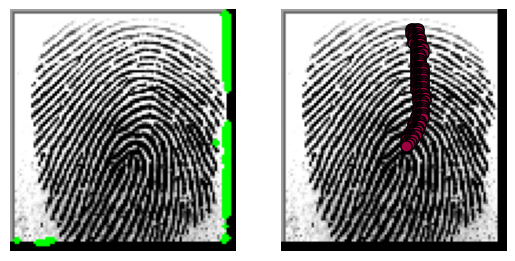

In [19]:
show_cluster(fingerprint_03.resized_image, fingerprint_03.clusters)

In [20]:
finger_prints = [fingerprint_01_01, fingerprint_01_02, fingerprint_02, fingerprint_03]
names = ["fingerprint_01_01", "fingerprint_01_02", "fingerprint_02", "fingerprint_03"]

calculator = DistanceCalculator()

def not_computed(i, j):
    return i < j

fingerprint_comparison_results = {}
for i, fingerprint1 in enumerate(finger_prints):
    for j, fingerprint2 in enumerate(finger_prints):
        if not_computed(i, j):
            fingerprint_comparison_results[f"{names[i]} vs {names[j]}"] = calculator.distance_for(fingerprint1, fingerprint2)

fingerprint_comparison_results

{'fingerprint_01_01 vs fingerprint_01_02': 4.394656444384119,
 'fingerprint_01_01 vs fingerprint_02': 4.023771676580534,
 'fingerprint_01_01 vs fingerprint_03': 3.760852000791548,
 'fingerprint_01_02 vs fingerprint_02': 2.6374813722876427,
 'fingerprint_01_02 vs fingerprint_03': 7.195196987054354,
 'fingerprint_02 vs fingerprint_03': 3.7676440225460985}

In [21]:
comparator = FingerPrintComparator([fingerprint_01_01, fingerprint_03, fingerprint_02])
print(comparator.fingerprint_similar_to(fingerprint_01_02))

IndexError: tuple index out of range